In [1]:
import pandas as pd
import sqlite3
import os


In [2]:
# Define the path for your SQLite database file
db_path = '/kaggle/working/music_database.db'

# Connect to the SQLite database (it will create the file if it doesn't exist)
conn = sqlite3.connect(db_path)


In [3]:
# Path to the folder containing your CSV files
csv_folder_path = '/kaggle/input/music-store-data-csvs/'

# Loop through all CSV files in the folder
for csv_file in os.listdir(csv_folder_path):
    if csv_file.endswith('.csv'):
        # Read the CSV file into a DataFrame
        df = pd.read_csv(os.path.join(csv_folder_path, csv_file))
        
        # Use the filename (without extension) as the table name
        table_name = os.path.splitext(csv_file)[0]
        
        # Write the DataFrame to the SQLite database
        df.to_sql(table_name, conn, if_exists='replace', index=False)

# Close the connection to the database
conn.close()


In [4]:
# Reconnect to the database
conn = sqlite3.connect(db_path)

# Query to get the list of tables
tables = conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()

# Print the list of tables
print("Tables in SQLite database:")
for table in tables:
    print(table[0])

# Close the connection
conn.close()

Tables in SQLite database:
genre
invoice
track
artist
playlist_track
album2
invoice_line
customer
playlist
employee
album
media_type


In [5]:
import shutil

# Move the SQLite file to the output directory
shutil.move(db_path, '/kaggle/working/my_database.db')

'/kaggle/working/my_database.db'

In [6]:
%load_ext sql

In [7]:
# Set the connection to the SQLite database
%sql sqlite:////kaggle/working/my_database.db

In [8]:
%%sql
SELECT name FROM sqlite_master WHERE type='table';


 * sqlite:////kaggle/working/my_database.db
Done.


name
genre
invoice
track
artist
playlist_track
album2
invoice_line
customer
playlist
employee


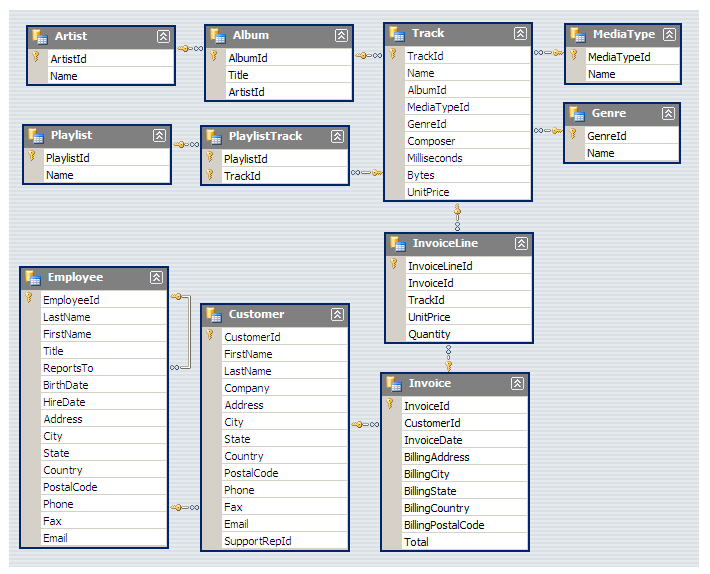

In [9]:
from IPython.display import Image, display

# Display an image
display(Image(filename='/kaggle/input/schema/MusicDatabaseSchema.png'))


Q1. Who is the senior most employee based on job title

In [10]:
%%sql
SELECT * FROM employee
ORDER BY levels DESC
LIMIT 1;

 * sqlite:////kaggle/working/my_database.db
Done.


employee_id,last_name,first_name,title,reports_to,levels,birthdate,hire_date,address,city,state,country,postal_code,phone,fax,email
9,Madan,Mohan,Senior General Manager,None,L7,26-01-1961 00:00,14-01-2016 00:00,1008 Vrinda Ave MT,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,madan.mohan@chinookcorp.com


Q2. Which countries have the most Invoices ?

In [11]:
%%sql
SELECT COUNT(*) AS no_of_inv, billing_country
FROM invoice
GROUP BY billing_country
ORDER BY no_of_inv DESC
LIMIT 5;

 * sqlite:////kaggle/working/my_database.db
Done.


no_of_inv,billing_country
131,USA
76,Canada
61,Brazil
50,France
41,Germany


Q3. What are the top 3 values of total invoice

In [12]:
%%sql
SELECT * 
FROM invoice
ORDER BY total DESC
LIMIT 3;

 * sqlite:////kaggle/working/my_database.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total
183,42,2018-02-09 00:00:00,"9, Place Louis Barthou",Bordeaux,None,France,33000,23.76
31,3,2017-02-21 00:00:00,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,19.8
92,32,2017-07-02 00:00:00,696 Osborne Street,Winnipeg,MB,Canada,R3L 2B9,19.8


Q4. Which city has the best customers? We would like to throw a promotional Music Festival in  the city we made the most money. 
 Write a query that returns one city that has the highest sum of invoice totals. 
 Return both the city name & sum of all invoice totals

In [13]:
%%sql
SELECT *, SUM(total) AS sum_inv_total 
FROM invoice
GROUP BY billing_city
ORDER BY sum_inv_total DESC
LIMIT 3;

 * sqlite:////kaggle/working/my_database.db
Done.


invoice_id,customer_id,invoice_date,billing_address,billing_city,billing_state,billing_country,billing_postal_code,total,sum_inv_total
78,5,2017-05-29 00:00:00,Klanova 9/506,Prague,None,Czech Republic,14700,8.91,273.24000000000007
17,20,2017-01-28 00:00:00,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,10.89,169.29
23,53,2017-02-09 00:00:00,113 Lupus St,London,None,United Kingdom,SW1V 3EN,9.9,166.32


Q5. Who is the best customer? The customer who has spent the most money will be declared the best customer. 
 Write a query that returns the person who has spent the most money

In [14]:
%%sql
SELECT c.customer_id, c.first_name, c.last_name, SUM(i.total) AS money_spent
FROM customer c
LEFT JOIN invoice i
ON c.customer_id = i.customer_id
GROUP BY i.customer_id
ORDER BY money_spent DESC
LIMIT 1;

 * sqlite:////kaggle/working/my_database.db
Done.


customer_id,first_name,last_name,money_spent
5,František,Wichterlová,144.54000000000002


# moderate:

 Q1. Write query to return the email, first name, last name, & Genre of all Rock Music listeners. 
 Return your list ordered alphabetically by email starting with A.

In [15]:
%%sql
SELECT DISTINCT c.email, c.first_name, c.last_name
FROM customer c
LEFT JOIN invoice i ON c.customer_id = i.customer_id
LEFT JOIN invoice_line il ON i.invoice_id = il.invoice_id
WHERE il.track_id IN (
    SELECT t.track_id FROM track t
    LEFT JOIN genre g ON t.genre_id = g.genre_id
    WHERE g.name LIKE 'Rock'
)
ORDER BY c.email;

 * sqlite:////kaggle/working/my_database.db
Done.


email,first_name,last_name
aaronmitchell@yahoo.ca,Aaron,Mitchell
alero@uol.com.br,Alexandre,Rocha
astrid.gruber@apple.at,Astrid,Gruber
bjorn.hansen@yahoo.no,Bjørn,Hansen
camille.bernard@yahoo.fr,Camille,Bernard
daan_peeters@apple.be,Daan,Peeters
diego.gutierrez@yahoo.ar,Diego,Gutiérrez
dmiller@comcast.com,Dan,Miller
dominiquelefebvre@gmail.com,Dominique,Lefebvre
edfrancis@yachoo.ca,Edward,Francis


OR

In [16]:
%%sql
SELECT DISTINCT email AS Email,first_name AS FirstName, last_name AS LastName, genre.name AS Name
FROM customer
JOIN invoice ON invoice.customer_id = customer.customer_id
JOIN invoice_line ON invoice_line.invoice_id = invoice.invoice_id
JOIN track ON track.track_id = invoice_line.track_id
JOIN genre ON genre.genre_id = track.genre_id
WHERE genre.name LIKE 'Rock'
ORDER BY email;

 * sqlite:////kaggle/working/my_database.db
Done.


Email,FirstName,LastName,Name
aaronmitchell@yahoo.ca,Aaron,Mitchell,Rock
alero@uol.com.br,Alexandre,Rocha,Rock
astrid.gruber@apple.at,Astrid,Gruber,Rock
bjorn.hansen@yahoo.no,Bjørn,Hansen,Rock
camille.bernard@yahoo.fr,Camille,Bernard,Rock
daan_peeters@apple.be,Daan,Peeters,Rock
diego.gutierrez@yahoo.ar,Diego,Gutiérrez,Rock
dmiller@comcast.com,Dan,Miller,Rock
dominiquelefebvre@gmail.com,Dominique,Lefebvre,Rock
edfrancis@yachoo.ca,Edward,Francis,Rock


Q2. Let's invite the artists who have written the most rock music in our dataset. 
Write a query that returns the Artist name and total track count of the top 10 rock bands

In [17]:
%%sql
SELECT a.artist_id, a.name,COUNT(a.artist_id) AS number_of_songs
FROM track
JOIN album ON album.album_id = track.album_id
JOIN artist a ON a.artist_id = album.artist_id
JOIN genre ON genre.genre_id = track.genre_id
WHERE genre.name LIKE 'Rock'
GROUP BY a.artist_id
ORDER BY number_of_songs DESC
LIMIT 10;

 * sqlite:////kaggle/working/my_database.db
Done.


artist_id,name,number_of_songs
22,Led Zeppelin,114
150,U2,112
58,Deep Purple,92
90,Iron Maiden,81
118,Pearl Jam,54
152,Van Halen,52
51,Queen,45
142,The Rolling Stones,41
76,Creedence Clearwater Revival,40
52,Kiss,35


 Q3. Return all the track names that have a song length longer than the average song length. 
Return the Name and Milliseconds for each track. Order by the song length with the longest songs listed first.

In [18]:
%%sql
SELECT name,milliseconds
FROM track
WHERE milliseconds > (
    SELECT AVG(milliseconds) AS avg_track_length
    FROM track )
ORDER BY milliseconds DESC;

 * sqlite:////kaggle/working/my_database.db
Done.


name,milliseconds
Occupation / Precipice,5286953
Through a Looking Glass,5088838
"Greetings from Earth, Pt. 1",2960293
The Man With Nine Lives,2956998
"Battlestar Galactica, Pt. 2",2956081
"Battlestar Galactica, Pt. 1",2952702
Murder On the Rising Star,2935894
"Battlestar Galactica, Pt. 3",2927802
Take the Celestra,2927677
Fire In Space,2926593


# Advanced

Q1. Find how much amount spent by each customer on artists? Write a query to return customer name, artist name and total spent

In [19]:
%%sql
WITH best_selling_artist AS (
    SELECT artist.artist_id AS artist_id, artist.name AS artist_name, SUM(invoice_line.unit_price*invoice_line.quantity) AS total_sales
    FROM invoice_line
    JOIN track ON track.track_id = invoice_line.track_id
    JOIN album ON album.album_id = track.album_id
    JOIN artist ON artist.artist_id = album.artist_id
    GROUP BY 1
    ORDER BY 3 DESC
    LIMIT 1
)
SELECT c.customer_id, c.first_name, c.last_name, bsa.artist_name, SUM(il.unit_price*il.quantity) AS amount_spent
FROM invoice i
JOIN customer c ON c.customer_id = i.customer_id
JOIN invoice_line il ON il.invoice_id = i.invoice_id
JOIN track t ON t.track_id = il.track_id
JOIN album alb ON alb.album_id = t.album_id
JOIN best_selling_artist bsa ON bsa.artist_id = alb.artist_id
GROUP BY 1,2,3,4
ORDER BY 5 DESC;

 * sqlite:////kaggle/working/my_database.db
Done.


customer_id,first_name,last_name,artist_name,amount_spent
46,Hugh,O'Reilly,Queen,27.719999999999985
38,Niklas,Schröder,Queen,18.81
3,François,Tremblay,Queen,17.82
34,João,Fernandes,Queen,16.830000000000002
41,Marc,Dubois,Queen,11.88
53,Phil,Hughes,Queen,11.88
33,Ellie,Sullivan,Queen,10.89
47,Lucas,Mancini,Queen,10.89
5,František,Wichterlová,Queen,3.96
20,Dan,Miller,Queen,3.96


Q2. We want to find out the most popular music Genre for each country. We determine the most popular genre as the genre 
with the highest amount of purchases. Write a query that returns each country along with the top Genre. For countries where 
the maximum number of purchases is shared return all Genres

In [20]:
%%sql
WITH popular_genre AS 
(
    SELECT COUNT(invoice_line.quantity) AS purchases, customer.country, genre.name, genre.genre_id, 
	ROW_NUMBER() OVER(PARTITION BY customer.country ORDER BY COUNT(invoice_line.quantity) DESC) AS RowNo 
    FROM invoice_line 
	JOIN invoice ON invoice.invoice_id = invoice_line.invoice_id
	JOIN customer ON customer.customer_id = invoice.customer_id
	JOIN track ON track.track_id = invoice_line.track_id
	JOIN genre ON genre.genre_id = track.genre_id
	GROUP BY 2,3,4
	ORDER BY 2 ASC, 1 DESC
)
SELECT * FROM popular_genre WHERE RowNo <= 1


 * sqlite:////kaggle/working/my_database.db
Done.


purchases,country,name,genre_id,RowNo
17,Argentina,Alternative & Punk,4,1
34,Australia,Rock,1,1
40,Austria,Rock,1,1
26,Belgium,Rock,1,1
205,Brazil,Rock,1,1
333,Canada,Rock,1,1
61,Chile,Rock,1,1
143,Czech Republic,Rock,1,1
24,Denmark,Rock,1,1
46,Finland,Rock,1,1
